# Tutorial 2 - Hilbert spaces

Hilbert spaces are complete inner product spaces. Within all inverse problems considered we will assume that both the model and data space are Hilbert spaces. This is a restriction, but one that is difficult to avoid in practice. The data space in any real inverse problem is necessarily finite dimensional and so can always be identified with $\mathbb{R}^{n}$ for some 
suitable $n \in \mathbb{N}$. In most cases of interest, however, the model space will be comprised of functions and be infinite-dimensional. Computationally we cannot deal directly with infinite-dimensional spaces, but we can ensure that we work with convergent discretisations. This means, roughly speaking, that the underlying mathematical problems are well-defined, and that the numerical methods can be shown to converge to the exact values as the size of the discretised model space is suitably increased.

In this tutorial we look into the representation of Hilbert spaces within the ```pygeoinf``` library through two examples. 
Hilbert spaces are represented by the ```HilbertSpace``` class. Importantly this class defines only the *structure* of the Hilbert space but not its elements. To construct a class instance the user must provide the following data:

- The dimension of the space. 
- A mapping from elements of the space to a chosen co-ordinate representation. 
- A mapping from this co-ordinate representation to elements of the space. 
- The inner product for the space. 
- A mapping from elements of the space to their associated dual vector.
- A mapping from elements of the dual space into the their representation within the space. 

In the case of infinite-dimensional spaces, the dimension, $n$, is understood as being that of an approximating space that is isomorphic to $\mathbb{R}^{n}$  through the co-ordinate mappings provided. 


## Euclidean space

The simplest Hilbert space is Euclidean space, and this is implemented in ```pygeoinf``` as the class ```EuclideanSpace``` that is derived from the ```HilbertSpace``` class. Constructuion of an instance of this class requires only its dimension. 

In [31]:
import numpy as np
import pygeoinf as inf

# Set up Euclidean space. 
dim = 4
X = inf.EuclideanSpace(dim)

# Print its dimension. 
print(f'Dimension of the vector space = {X.dim}')

Dimension of the vector space = 4


Elements of ```EuclideanSpace``` are just ```numpy``` vectors. In the following we generate a random element and get its components. For ```EuclideanSpace``` a vector and the vector of its components are the same. Note that the ```random``` method for ```HilbertSpaces``` internally generates a component vector drawn from a standard Gaussian distribution and then maps this to an element of the space. This method is only meant to provide a quick means of generating elements for testing. 

In [32]:
# Generate a random element of the space and print its value. 
x = X.random()
print(f'The vector is equal to:               {x}')

# Now get its component vector which, in this case, is the same thing. 
c = X.to_components(x)
print(f'The vector\'s components are equal to: {c}')

The vector is equal to:               [-0.94050314 -1.55399348  0.01474841 -0.87180215]
The vector's components are equal to: [-0.94050314 -1.55399348  0.01474841 -0.87180215]


If needed, we can access the zero vector is the space as follows:

In [33]:
# Generate a the zero vector -- note that this is a property of the class. 
x = X.zero
print(f'The vector is equal to:               {x}')

# Now get its component vector, which in this case is the same thing. 
c = X.to_components(x)
print(f'The vector\'s components are equal to: {c}')

The vector is equal to:               [0. 0. 0. 0.]
The vector's components are equal to: [0. 0. 0. 0.]


Given two element of the space, we can compute their inner product:

In [34]:
x1 = X.random()
x2 = X.random()
print(f'The first vector is:  {x1} ')
print(f'The second vector is: {x2} ')
print(f'Their inner product is equal to: {X.inner_product(x1, x2)}')

The first vector is:  [-0.70812527  1.63446876  0.4884683  -0.10509565] 
The second vector is: [-0.44905088 -1.27789086 -0.82394966 -0.0545925 ] 
Their inner product is equal to: -2.1674242660392156


The inner product defines a norm, and we can access this as follows:

In [35]:
x = X.random()
print(f'The vector is equal to: {x}')
print(f'The vector has norm: {X.norm(x)}')
print(f'The vector has norm: {X.squared_norm(x)}')

The vector is equal to: [-1.34594991  0.32537234  0.00157404 -1.10174214]
The vector has norm: 1.7695441573204007
The vector has norm: 3.131286524706767


We can use these methods to verify that standard Hilbert space inequalities are satified. 

In [36]:
x1 = X.random()
x2 = X.random()
print(f"The first vector is:  {x1} ")
print(f"The second vector is: {x2} ")

print(
    f"The triangle inequality, |x1 + x2| <= |x1| + |x2|, is {X.norm(x1+x2) <= X.norm(x1) + X.norm(x2)}."
)

print(
    f"The Cauchy-Scwharz inequality, |(x1,x2)| <= |x1||x2|, is {np.abs(X.inner_product(x1,x2)) <= X.norm(x1) * X.norm(x2)}."
)


The first vector is:  [-0.05570673  0.52997881  0.99191384 -1.48697487] 
The second vector is: [-0.04293565  1.41702317 -0.19849606  0.14381824] 
The triangle inequality, |x1 + x2| <= |x1| + |x2|, is True.
The Cauchy-Scwharz inequality, |(x1,x2)| <= |x1||x2|, is True.


For ```HilbertSpaces``` whose elements have the standard vector operations already overloaded we can directly add, subtract or scalar multiply them. 

Such operations are also available through methods within the ```HilbertSpace``` class. For example

In [37]:
x1 = X.random()
x2 = X.random()  
print(f"\nThe first vector is:              {x1} ")
print(f"The second vector is:             {x2} ")

x3 = X.add(x1,x2)
print(f"The sum of the vectors is:        {x3} ")

print(f"The first vector times by teo is: {X.multiply(2,x1)} ")

x4 = X.copy(x3)
print(f"A copy of the third vector is:    {x4} ")




The first vector is:              [-1.58150712 -0.64363848 -0.00909619 -2.39478927] 
The second vector is:             [ 1.28928645 -0.80923383 -0.53908416  0.30105636] 
The sum of the vectors is:        [-0.29222067 -1.45287231 -0.54818035 -2.09373291] 
The first vector times by teo is: [-3.16301424 -1.28727696 -0.01819239 -4.78957854] 
A copy of the third vector is:    [-0.29222067 -1.45287231 -0.54818035 -2.09373291] 


Custom implementation for these operations can be provided when a ```HilbertSpace``` is constructed. 

The ```HilbertSpace``` class also provides convenient methods for generating certain element of the space. For example, if we want a particular basis vector we write:

In [38]:
i = 2
x = X.basis_vector(2)
print(f"The {i}th basis vector is: {x} ")

The 2th basis vector is: [0. 0. 1. 0.] 


## Sobolev spaces on the unit circle 

### Mathematical definitions

 
Within the example inverse problem in Tutorial 1, the data space was represented by an instance of ```EuclideanSpace```. The model space, however, provides a more interesting example of a Hilbert space, $H^{s}(\mathbb{S}^{1})$, that is defined by
$$
H^{s}(\mathbb{S}^{1}) = \{
u \in \mathcal{D}'(\mathbb{S}^{1}) \,|\, (1+\lambda^{2}\Delta)^{s/2} u \in L^{2}(\mathbb{S}^{1})
\},
$$
where the **exponent**, $s\in \mathbb{R}$, and **length-scale** $\lambda > 0$. Here $\mathcal{D}'(\mathbb{S}^{1})$ is the space of distributions on $\mathbb{S}^{1}$, $L^{2}(\mathbb{S}^{2})$ the Hilbert space of square-integrable functions that has inner product
$$
(u,v)_{L^{2}(\mathbb{S}^{1})} = \int_{0}^{2\pi} \overline{u} v \, \mathrm{d} \theta, 
$$
and $\Delta = -\frac{\mathrm{d}^{2}}{\mathrm{d}\theta^{2}}$ is the Laplacian. The latter operator extends to a non-negative self-adjoint operator on $L^{2}(\mathbb{S}^{1})$ and $(1+\lambda^{2}\Delta)^{s/2}$ is defined through the spectral theorem. The inner product on this space is defined by
$$
(u,v)_{H^{s}(\mathbb{S}^{1})} = \left((1+\lambda^{2}\Delta)^{s/2} u,(1+\lambda^{2}\Delta)^{s/2} v\right)_{L^{2}(\mathbb{S}^{1})}.
$$
Clearly we have $H^{0}(\mathbb{S}^{1}) = L^{2}(\mathbb{S}^{1})$, while for any $t > s$ we have the  continuous and compact inclusion
$$
H^{t}(\mathbb{S}^{1}) \subseteq H^{s}(\mathbb{S}^{1}).
$$
Note that the topology of $H^{s}(\mathbb{S}^{1})$ is independent of the length-scale. 

To work with this space practically, we can use Fourier decomposition. For any $u \in \mathcal{D}'(\mathbb{S}^{1})$ we have the convergent Fourier expansion
$$
u = \sum_{k=-\infty}^{\infty} u_{k} \phi_{k}, \quad u_{k} = (\phi_{k},u)_{L^{2}(\mathbb{S}^{1})},
$$
where the basis functions
$$
\phi_{k}(\theta) = \frac{1}{\sqrt{2\pi}} \mathrm{e}^{\mathrm{i} k \theta}
$$
are complete and orthonormal in $L^{2}(\mathbb{S}^{1})$. It can be shown that such a $u \in \mathcal{D}'(\mathbb{S}^{1})$ belongs to $L^{2}(\mathbb{S}^{1})$ if and only if its Fourier coefficients are square-summable. It follows that we can equivalently characterise elements of $H^{s}(\mathbb{S}^{1})$ through
$$
\sum_{k=-\infty}^{\infty}(1 + \lambda^{2}k^{2})^{s}|u_{k}|^{2} < \infty, 
$$
while the spaces inner product can be written 
$$
(u,v)_{H^{s}(\mathbb{S}^{1})} = \sum_{k=-\infty}^{\infty}(1 + \lambda^{2}k^{2})^{s} \overline{u_{k}} v_{k}.
$$
In the above discussion we have considered complex-valued functions for convenience. The definitions all specialise to the real case where we have the symmetry $\overline{u_{k}}  = u_{-k}$ for the Fourier coefficients. 

### Implementation as a ```HilbertSpace```

An implementation of $H^{1}(\mathbb{S}^{1})$ can be found in the ```SobolevClass``` contained in the sub-package ```pygeoinf.homogeneous_space.circle```. Elements of the space are numpy vectors of function values on an equally spaced grid. The components are then Fourier coefficients for non-negative indices, with the mapping from a vector to its components performed using a real FFT. To construct an instance of this space, the user provides:

- A maximum degree, $k_{\mathrm{max}} \in \mathbb{N}$, for the Fourier expansions. The number of spatial points is equal to twice this value. 
- The Sobolev exponent, $s \in \mathbb{R}$. 
- The Sobolev length-scale, $\lambda >0$. 
- An optional radius, $a > 0$, for the circle with default value $a = 1$. When $a \ne 1$ the above definitions are transformed in the obvious manner. 

The code below constructs an instance of the ``Sobolev``` class and prints its dimension:

In [39]:
from pygeoinf.homogeneous_space.circle import Sobolev

Y = Sobolev(256, 2, 0.1)
print(f'The dimension of the space is equal to: {Y.dim}')

The dimension of the space is equal to: 512


We can then visualise the first few basis vectors as follows:

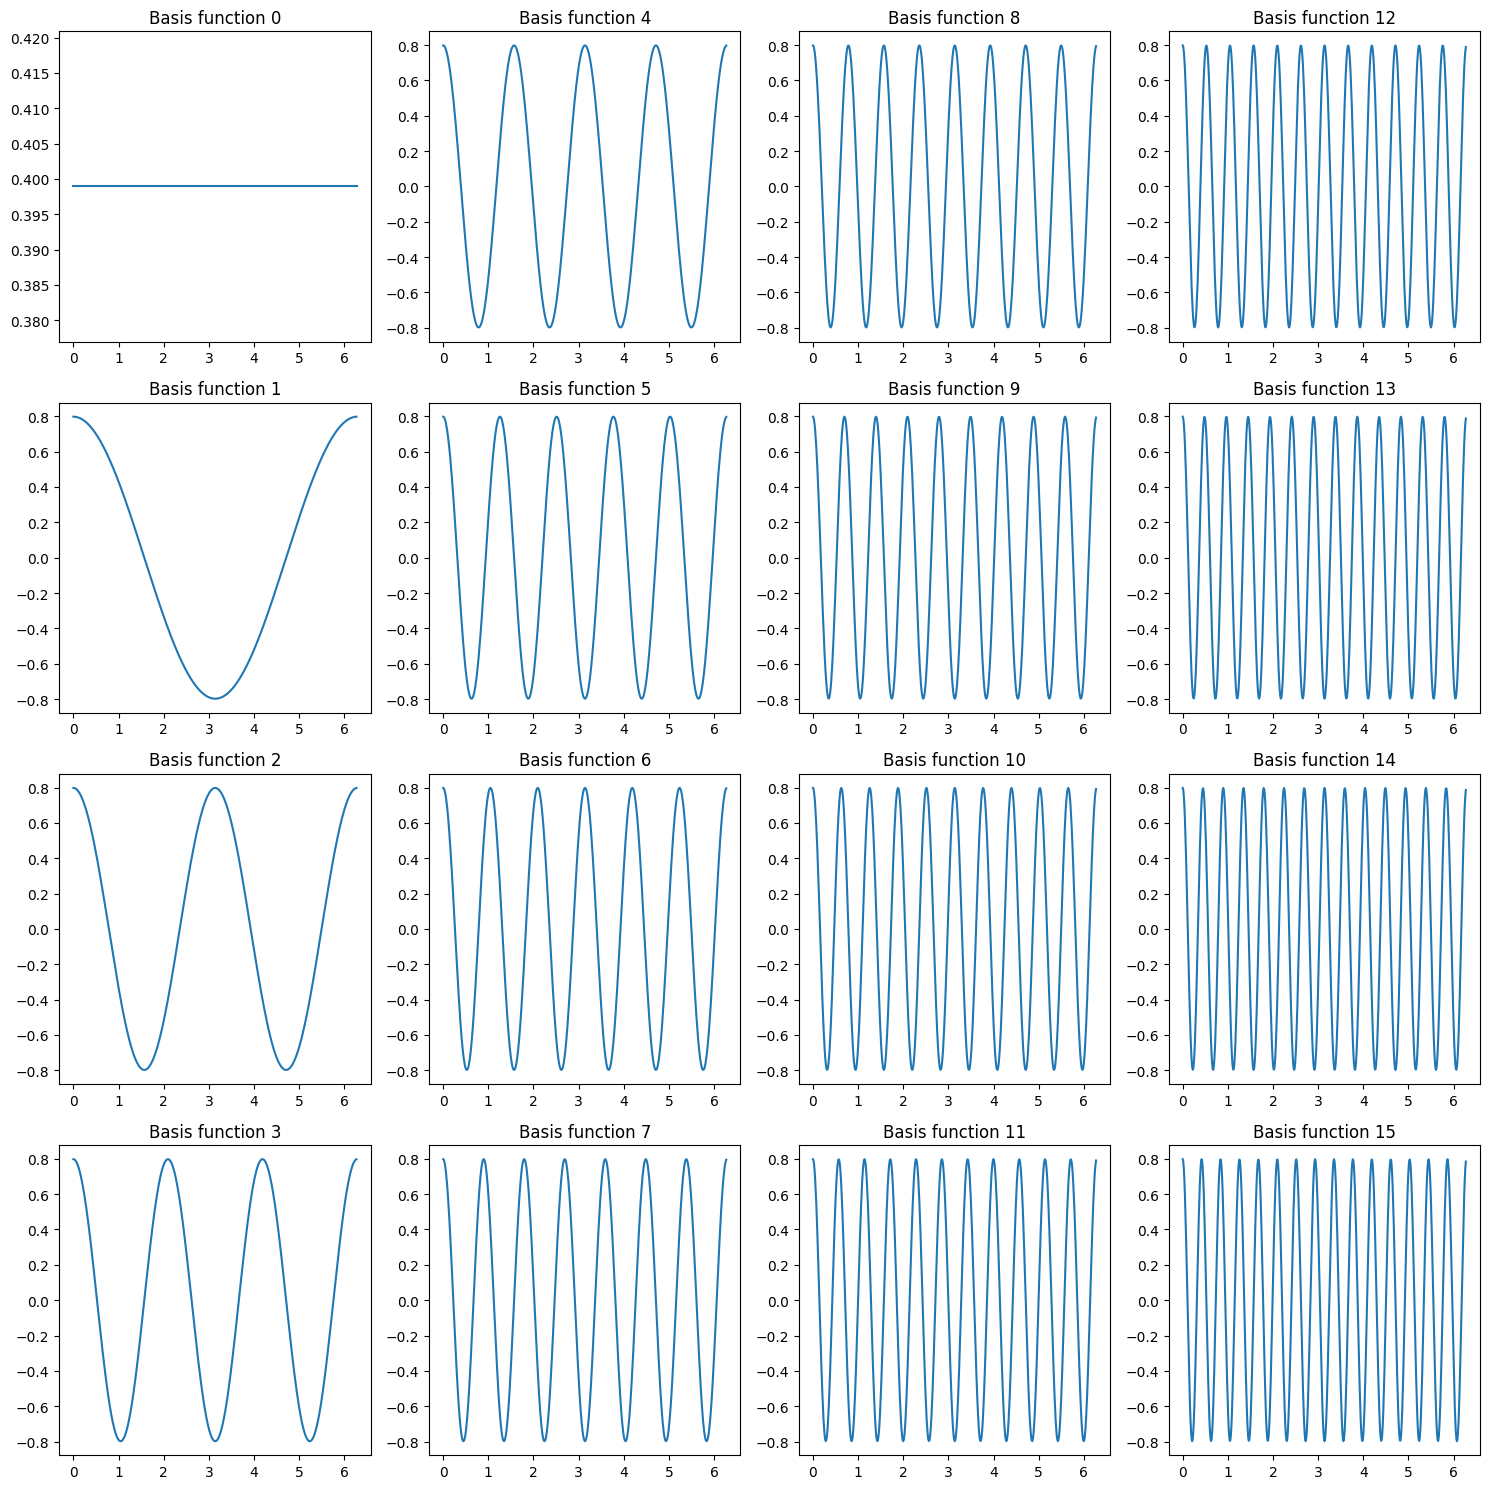

In [40]:
import matplotlib.pyplot as plt

m = 4
fig, axs = plt.subplots(m,m, figsize=(15,15))

for j in range(m):
    for i in range(m):
        ax = axs[i,j]
        k = i + m * j
        u = Y.basis_vector(k)
        Y.plot(u, fig=fig, ax=ax)
        ax.set_title(f'Basis function {k}')

plt.tight_layout()
plt.show()

Note that each of the basis functions shown is a cosine function. This is because the real and imaginary parts of the Fourier coefficients are separated out in the component vector, with the real parts being stored first. 

Elements of this space can be defined by projecting a given function:

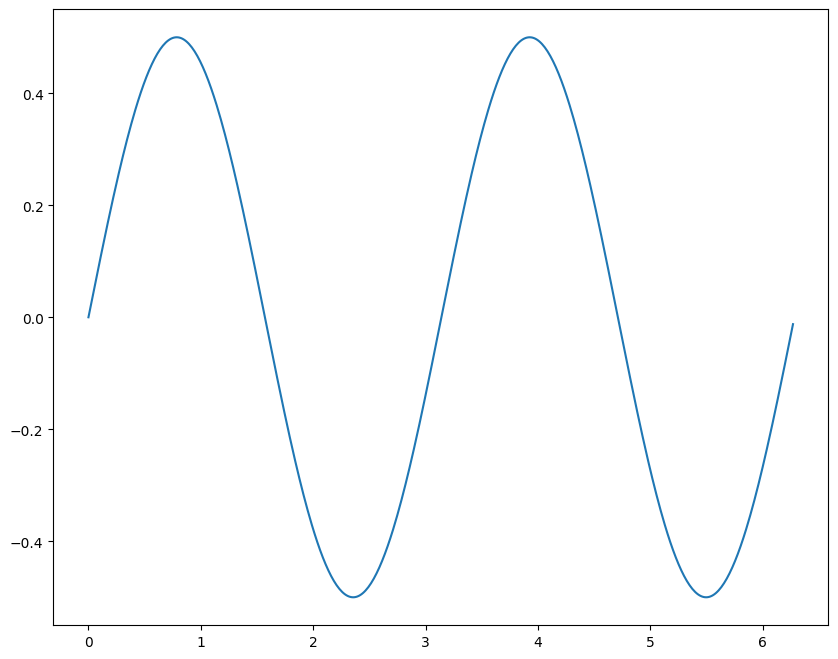

In [41]:
u = Y.project_function(lambda th: np.sin(th)*np.cos(th))
Y.plot(u)
plt.show()

All the vector operations work on this space just as with ```EuclideanSpace```. For example:

In [42]:
v =  Y.project_function(lambda th: np.cos(5*th))
print(f'The norm of u is {Y.norm(u)}')
print(f'The norm of v is {Y.norm(v)}')
print(f'The inner product of u and v is {Y.inner_product(u,v)}')

The norm of u is 0.9216760024708682
The norm of v is 2.2155673136318943
The inner product of u and v is 2.929384993133827e-17
